## **Setup & Load the Data**
---

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [2]:
# Load a CSV file from your local file system
df = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/raw_analyst_ratings_cleaned.csv')
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


---
## **Time Series Analysis**
### **Publication Frequency Over Time:**

# Reset index if needed
df.reset_index(inplace=True)

# Plot articles by hour
df['hour'] = df['date'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df)
plt.title('Articles Published by Hour of Day')
plt.xlabel('Hour (UTC-4)')
plt.ylabel('Number of Articles')
plt.show()


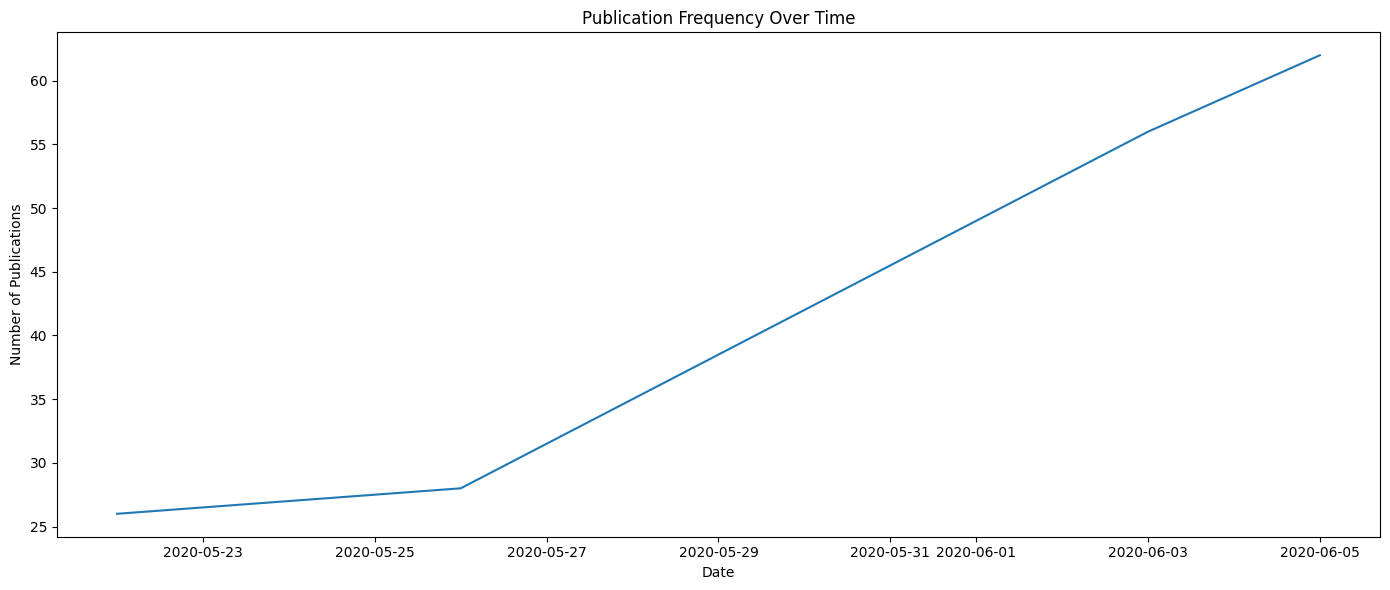

In [5]:
# Ensure 'date' column is in datetime format, handling mixed formats
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by date (day) and count publications
pub_freq = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(14, 6))
pub_freq.plot()
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.tight_layout()
plt.show()

### **Summary: Publication Frequency Over Time**

The publication frequency analysis visualizes how many articles were published each day. The time series plot shows fluctuations in the number of articles, with certain days experiencing higher publication activity. For example, on June 5, 2020, there were 62 articles published, while on May 22, 2020, there were 26 articles. This analysis helps identify trends, peak publication periods, and potential patterns in article releases over time.